In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.pipeline import Pipeline

In [2]:
train_df = pd.read_csv('train_ctrUa4K.csv')
test_df = pd.read_csv('test_lAUu6dG.csv')
print( train_df.shape, test_df.shape)

(614, 13) (367, 12)


In [39]:
data_xy = train_df.append(test_df)
data_xy.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [40]:
data_xy.shape

(981, 13)

In [41]:
data_xy.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [42]:
data_xy.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [43]:
data_xy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 107.3+ KB


# Missing Values

In [56]:
data_xy.isnull().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [58]:
data_xy.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [60]:
cat_col = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Loan_Status']
num_col =['LoanAmount', 'Loan_Amount_Term', 'Credit_History']

In [66]:
for feature in cat_col:
    if feature in data_xy.columns.values:
        data_xy[feature] = data_xy[feature].fillna(data_xy[feature].value_counts().index[0])         
        
for feature in num_col:
    if feature in data_xy.columns.values:
        data_xy[feature] = data_xy[feature].fillna(data_xy[feature].mean()) 

In [67]:
data_xy.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Exploration

In [68]:
data_xy['Loan_Status'].value_counts()

Y    789
N    192
Name: Loan_Status, dtype: int64

In [69]:
# Imbalanced DataSet
data_xy['Loan_Status'].value_counts()/len(data_xy)

Y    0.804281
N    0.195719
Name: Loan_Status, dtype: float64

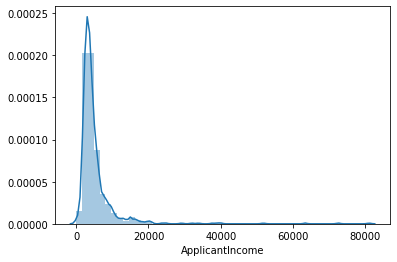

<Figure size 432x288 with 0 Axes>

In [71]:
sns.distplot(data_xy['ApplicantIncome'], hist = True)
fig = plt.figure()

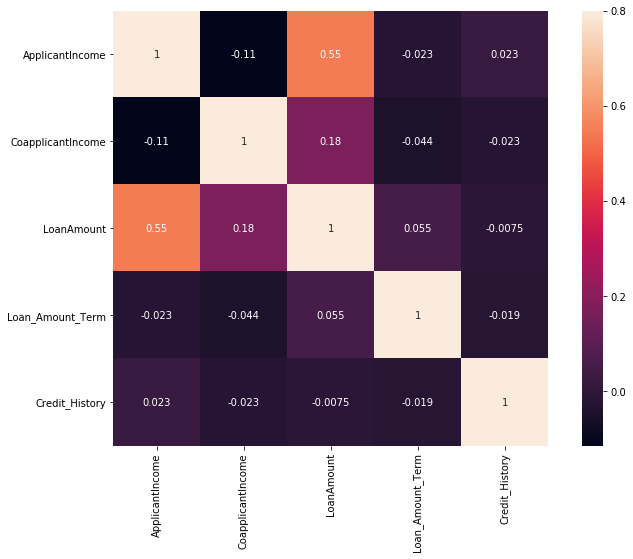

In [72]:
corr = data_xy.corr()
plt.figure(figsize = (12,8))
sns.heatmap(corr, vmax =0.8, annot = True, square = True)
plt.show()

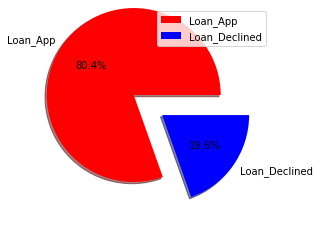

In [74]:
labels = 'Loan_App', 'Loan_Declined'
sizes = data_xy['Loan_Status'].value_counts()
colors= ['red', 'blue']
explode = [0.4,0]
plt.pie(sizes, explode = explode, labels =labels, autopct ="%1.1f%%", colors = colors, shadow = True)
plt.legend()
plt.show()

In [81]:
#data_xy.dtypes
#data_xy['Dependents']= data_xy['Dependents'].astype(int)

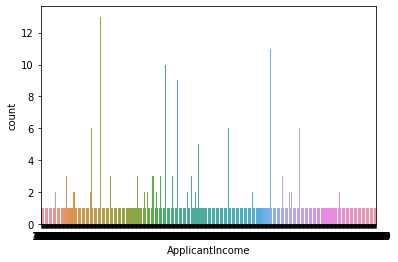

In [76]:
sns.countplot(x = 'ApplicantIncome', data= data_xy)

In [87]:
import re
data_xy['Dependents'] =data_xy['Dependents'].str.replace("+", " ")

In [88]:
data_xy['Dependents'].value_counts()

0     570
1     160
2     160
3      91
Name: Dependents, dtype: int64

# Converting Categorical to Numerical Features 

In [94]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [95]:
data_xy.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [96]:
cat_columns = ['Gender', 'Married', 'Education', 'Dependents', 'Self_Employed', 'Property_Area', 'Loan_Status']

for i in cat_columns:
    le = LabelEncoder()
    data_xy[i] = le.fit_transform(data_xy[i])    

In [97]:
data_xy.dtypes

Loan_ID               object
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

In [98]:
data_xy.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,142.51153,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.00000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.00000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.00000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.00000,360.0,1.0,2,1


In [105]:
data_xy['Total_Income']= data_xy['ApplicantIncome']+data_xy['CoapplicantIncome']
data_xy['Loan/Income']=data_xy['LoanAmount']/data_xy['Total_Income']
data_xy['Loan/Term']=data_xy['LoanAmount']/data_xy['Loan_Amount_Term']

data_xy.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Loan/Income,Loan/Term
0,LP001002,1,0,0,0,0,5849,0.0,142.51153,360.0,1.0,2,1,5849.0,0.024365,0.395865
1,LP001003,1,1,1,0,0,4583,1508.0,128.00000,360.0,1.0,0,0,6091.0,0.021015,0.355556
2,LP001005,1,1,0,0,1,3000,0.0,66.00000,360.0,1.0,2,1,3000.0,0.022000,0.183333
3,LP001006,1,1,0,1,0,2583,2358.0,120.00000,360.0,1.0,2,1,4941.0,0.024287,0.333333
4,LP001008,1,0,0,0,0,6000,0.0,141.00000,360.0,1.0,2,1,6000.0,0.023500,0.391667


In [ ]:
#Features to be scaled   ApplicantIncome, CoapplicantIncome , LoanAmount, Loan_Amount_Term, Credit_History,Total_Income ,Loan/Income ,Loan/Term

In [112]:
#Seperating Independent and Dependent Variable
X = data_xy.drop(['Loan_Status', 'Loan_ID'], axis =1)
y = data_xy['Loan_Status']
print(X.shape, y.shape)

(981, 14) (981,)


In [116]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int32

In [119]:
Grant = data_xy[data_xy['Loan_Status']==1]
Decline = data_xy[data_xy['Loan_Status']==0]

In [120]:
print(Grant.shape,Decline.shape)

(789, 16) (192, 16)


# Treating Imbalanced DataSet

In [124]:
# Use the below command to install imblearn package #OverSampling_Technique
#pip install -U imbalanced-learn

In [125]:
from imblearn.combine import SMOTETomek

In [127]:
smk = SMOTETomek(random_state=42)
X_res,y_res=smk.fit_sample(X,y)

In [128]:
X_res.shape,y_res.shape

((1376, 14), (1376,))

In [129]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({1: 789, 0: 192})
Resampled dataset shape Counter({1: 688, 0: 688})


In [133]:
X_res.head()
y_res.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income,Loan/Income,Loan/Term
0,1,0,0,0,0,5849,0.0,142.51153,360.0,1.0,2,5849.0,0.024365,0.395865
1,1,1,1,0,0,4583,1508.0,128.00000,360.0,1.0,0,6091.0,0.021015,0.355556
2,1,1,0,0,1,3000,0.0,66.00000,360.0,1.0,2,3000.0,0.022000,0.183333
3,1,1,0,1,0,2583,2358.0,120.00000,360.0,1.0,2,4941.0,0.024287,0.333333
4,1,0,0,0,0,6000,0.0,141.00000,360.0,1.0,2,6000.0,0.023500,0.391667


In [135]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, Y_train, Y_test = tts(X_res, y_res, random_state= 42, test_size = 0.3)

# ModelBuild In Various Algorithms

In [144]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

In [151]:
def fit_model(X, y, model_name='lr', model_type = LogisticRegression()):
    
    #Pipeline for Preprocessing
    pipe = Pipeline([('scale', StandardScaler()), (model_name, model_type)])
    
    #fit the model
    model = pipe.fit(X,y)
    
    #Score the model
    score = model.score(X,y)
    print(f"For Model): {model_type}")
    
    return model

In [157]:
def evaluate_model(model,X_train, X_test, Y_train, Y_test):
    
    preds_train = model.predict(X_train)
    score_train = model.score(X_train, Y_train)
    
    preds_test = model.predict(X_test)
    score_test = model.score(X_test, Y_test)
    
    print(f"Train_score : {score_train:.4f}")
    print(f"Test_score : {score_test:.4f}")

In [161]:
rf = fit_model(X_train, Y_train, model_name='logreg', model_type=LogisticRegression())

evaluate_model(rf,X_train, X_test, Y_train, Y_test)

For Model): LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Train_score : 0.7612
Test_score : 0.7579


In [162]:
dtc = fit_model(X_train, Y_train, model_name='dtc', model_type=DecisionTreeClassifier())
evaluate_model(dtc,X_train, X_test, Y_train, Y_test)

For Model): DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Train_score : 1.0000
Test_score : 0.8402


In [163]:

knn = fit_model(X_train, Y_train, model_name='knc', model_type=KNeighborsClassifier())

evaluate_model(knn,X_train, X_test, Y_train, Y_test)

For Model): KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
Train_score : 0.8307
Test_score : 0.7627


In [164]:

GNN = fit_model(X_train, Y_train, model_name='gnb', model_type=GaussianNB())

evaluate_model(GNN,X_train, X_test, Y_train, Y_test)

For Model): GaussianNB(priors=None, var_smoothing=1e-09)
Train_score : 0.7175
Test_score : 0.7191


In [165]:

svm = fit_model(X_train, Y_train, model_name='SVC', model_type=SVC())

evaluate_model(svm,X_train, X_test, Y_train, Y_test)

For Model): SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Train_score : 0.8349
Test_score : 0.7990


In [166]:

random = fit_model(X_train, Y_train, model_name='rfc', model_type=RandomForestClassifier())

evaluate_model(random,X_train, X_test, Y_train, Y_test)

For Model): RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Train_score : 1.0000
Test_score : 0.8692


In [167]:

baggclass = fit_model(X_train, Y_train, model_name='bc', model_type=BaggingClassifier())

evaluate_model(baggclass,X_train, X_test, Y_train, Y_test)

For Model): BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)
Train_score : 0.9917
Test_score : 0.8668


In [168]:

adaboost = fit_model(X_train, Y_train, model_name='adc', model_type=AdaBoostClassifier())

evaluate_model(adaboost,X_train, X_test, Y_train, Y_test)

For Model): AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)
Train_score : 0.8577
Test_score : 0.8329


In [169]:
#Proceed_Further
gradient = fit_model(X_train, Y_train, model_name='gbc', model_type=GradientBoostingClassifier())

evaluate_model(gradient,X_train, X_test, Y_train, Y_test)

For Model): GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
Train_score : 0.9408
Test_score : 0.8499


# HyperParameter_Tuning

In [194]:
#from sklearn.model_selection import RandomizedSearchCV
#from sklearn.model_selection import GridSearchCV

In [195]:
#gbc = GradientBoostingClassifier(random_state=42)

In [196]:
#parameter_grid = {
    
#    'max_depth' : [4,5,6,7,8,9],
#    'max_features' : [0.3,0.5,0.7,0.9]
#}

In [197]:
#randomsearch = RandomizedSearchCV(estimator = gbc, param_distributions = parameter_grid, n_iter=5,cv =5, scoring = 'roc_auc', n_jobs = -1, verbose =3)

In [198]:
#randomsearch.fit(X_train, Y_train)

In [191]:
#randomsearch.score(X_train, Y_train)

In [192]:
#print(randomsearch.score(X_train, Y_train))
#print(randomsearch.score(X_test, Y_test))

In [186]:
#from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold

In [193]:
#print(cross_val_score(gbc, X_train, Y_train, cv=5).mean())

In [199]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
svc=LogisticRegression()
svc.fit(X_train, Y_train)
pred=svc.predict(X_test)
print(accuracy_score(Y_test,pred))
print(confusion_matrix(Y_test,pred))
print(classification_report(Y_test,pred))

0.7796610169491526
[[152  45]
 [ 46 170]]
              precision    recall  f1-score   support

           0       0.77      0.77      0.77       197
           1       0.79      0.79      0.79       216

    accuracy                           0.78       413
   macro avg       0.78      0.78      0.78       413
weighted avg       0.78      0.78      0.78       413



C:\Users\VigneshSS\Anaconda3\envs\new_env\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [201]:
outp=svc.predict(X_test).astype(int)
outp

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,

In [210]:
bc =BaggingClassifier()
bc.fit(X_train, Y_train)
pred = bc.predict(X_test)

In [212]:
print(accuracy_score(Y_test, pred))
print(confusion_matrix(Y_test,pred))
print(classification_report(Y_test,pred))

0.847457627118644
[[172  25]
 [ 38 178]]
              precision    recall  f1-score   support

           0       0.82      0.87      0.85       197
           1       0.88      0.82      0.85       216

    accuracy                           0.85       413
   macro avg       0.85      0.85      0.85       413
weighted avg       0.85      0.85      0.85       413



In [218]:
#X['Loan_ID'].head()
GBCFormat=bc.predict(X_test).astype(int)
GBCFormat

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,

In [219]:
#BaggingClassifierFormat = ["Y" if i == 1 else "N" for i in GBCFormat ]

In [221]:
#pd.DataFrame({'Loan_ID':train_df.Loan_ID,'Loan_Status':BaggingClassifierFormat}).to_csv('BaggingClassifierFormat_submission.csv',index=False)

In [227]:
df_output = pd.DataFrame()
test_df = pd.read_csv('test_lAUu6dG.csv')
df_output['Loan_ID'] = test_df['Loan_ID']
df_output['Loan_Status'] = np.vectorize(lambda s: 'Y' if s==1 else 'N')(GBCFormat)
df_output[['Loan_ID','Loan_Status']].to_csv('output.csv',index=False)

ValueError: Length of values does not match length of index

In [228]:
y_predict=pd.DataFrame(GBCFormat,columns =['Loan_Status'],index=test_df.index)
y_predict['Loan_Status']= y_predict['Loan_Status'].map({1: 'Y', 0: 'N'})
y_predict.to_csv("Submission.csv")
y_predict.head()

ValueError: Shape of passed values is (413, 1), indices imply (367, 1)